## Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import TumorDecon as td
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

## Data

In [2]:
lm22 = pd.read_csv("../data/LM22_source_GEPs.txt",delimiter="\t",index_col="genesinput")
lm22.shape

(11845, 22)

In [3]:
lm22_small = pd.read_csv("../data/LM22.txt",delimiter="\t",index_col="Gene symbol")
lm22_small.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,555.713449,10.744235,7.225819,4.311280,4.605860,7.406442,8.043976,6.469993,7.833082,9.312295,...,6.202496,7.951360,27.557710,121.432277,114.636747,4.872184,4.727985,34.113659,15.030530,14.906888
ABCB9,15.603544,22.094787,653.392328,24.223723,35.671507,30.048192,38.455423,17.604795,46.073657,19.715722,...,20.309426,56.251887,29.380878,40.390260,123.993305,23.384603,53.466757,23.615746,29.786442,33.679147
ACAP1,215.305951,321.621021,38.616872,1055.613378,1790.097170,922.152747,340.883424,1107.798265,1995.482601,280.075719,...,190.879024,48.972217,30.974254,23.055150,61.386550,26.412923,104.200198,73.607932,696.442802,596.025961
ACHE,15.117949,16.648847,22.123737,13.428288,27.187732,18.444927,13.441268,14.805542,24.652712,33.658448,...,16.375268,13.692963,1373.069620,48.585761,16.715474,193.159977,13.948778,20.501249,40.414927,22.766494
ACP5,605.897384,1935.201479,1120.104684,306.312519,744.656599,557.819820,248.546932,711.949744,958.916018,493.969120,...,512.931382,13644.172300,1062.475909,7633.960182,13825.053630,3989.865169,263.497930,323.381277,860.563374,307.142798


In [4]:
def generate_samples(num_samples, lm22, max_dropout=.2):
    generated_x = np.zeros((num_samples,11845))
    generated_y = np.zeros((num_samples,22))
    lm22_values = lm22.values
    number_of_each_cell = np.random.randint(0,15,size=(num_samples, 22))
    
    for i in range(num_samples):
        generated_x[i] = np.sum(lm22_values*number_of_each_cell[i], axis=1)
        indices = np.random.choice(np.arange(11845), replace=False,
                           size=int(11845 * np.random.uniform(max_dropout)))
        generated_x[i][indices] = 0
        generated_y[i] = number_of_each_cell[i]/np.sum(number_of_each_cell[i])
    
    
    t = td.df_normalization(pd.DataFrame(data=generated_x),"minmax")
    g_min = generated_x.min(axis=1)
    generated_x =(generated_x.T - g_min) / (generated_x.max(axis=1) - g_min)
    return generated_x.T, generated_y
    
def format_input(expression_df, lm22):
    return

In [ ]:
def combined_loss(y_actual,y_pred):
    encoder = tf.keras.Model(m.input, m.get_layer('bottleneck').output)
    Zenc = encoder.predict(X_train)  # bottleneck representation
    other_loss = m2.predict(Zenc)
    mse = tf.keras.losses.MeanSquaredError()
    mse(y_true, y_pred).numpy()
    loss = 

In [77]:
m = tf.keras.Sequential()
m.add(tf.keras.layers.Dense(1024,  activation='elu', input_shape=(11845,)))
m.add(tf.keras.layers.Dense(512,  activation='elu'))
m.add(tf.keras.layers.Dense(128,  activation='elu'))
m.add(tf.keras.layers.Dense(64,    activation='linear', name="bottleneck"))
m.add(tf.keras.layers.Dense(128,  activation='elu'))
m.add(tf.keras.layers.Dense(512,  activation='elu'))
m.add(tf.keras.layers.Dense(1024,  activation='elu'))
m.add(tf.keras.layers.Dense(11845,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(),metrics=['mse'])

m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.Dense(128,  activation='elu', input_shape=(64,)))
m2.add(tf.keras.layers.Dense(128,  activation='elu'))
m2.add(tf.keras.layers.Dense(22,    activation='linear'))
m2.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(),metrics=['mse'])

In [78]:
X,Y = generate_samples(50000,lm22,max_dropout=0.2)

In [79]:
#td.cell_frequency_barchart(pd.DataFrame(data=Y,columns=lm22_small.columns))

## Models
The generated data looks pretty good so now I am going to move onto modeling and making an auto encoder to reduce the dimensionality of the data. Then I will train a neural net totake in the reduced vector and predict immune cell fractions

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [81]:
X_train.shape

(45000, 11845)

In [82]:
history = m.fit(X_train, X_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, X_test))

encoder = tf.keras.Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X_train)  # bottleneck representation
Renc = m.predict(X_train)        # reconstruction

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 11s 246us/sample - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2/10
45000/45000 [==============================] - 10s 223us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/10
45000/45000 [==============================] - 10s 224us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/10
45000/45000 [==============================] - 10s 224us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/10
45000/45000 [==============================] - 10s 224us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/10
45000/45000 [==============================] - 10s 224us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/10
45000/45000 [==============================] - 10s 224us/sample - loss: 0.0012 - mse: 0.0012 -

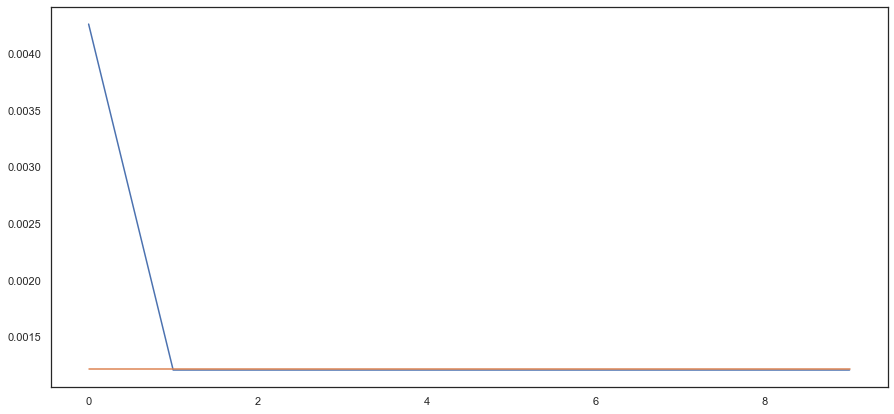

In [83]:
plt.plot(history.history['mse'], label='root_mean_squared_error')    #blue
plt.plot(history.history['val_mse'], label = 'val_root_mean_squared_error') 

In [84]:
history = m2.fit(Zenc, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(encoder.predict(X_test), y_test))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 2s 47us/sample - loss: 1.8509 - mse: 1.8509 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/20
45000/45000 [==============================] - 1s 26us/sample - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/20
45000/45000 [==============================] - 1s 23us/sample - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 4/20
45000/45000 [==============================] - 1s 24us/sample - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/20
45000/45000 [==============================] - 1s 23us/sample - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/20
45000/45000 [==============================] - 1s 24us/sample - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 7/20
45000/45000 [==============================] - 1s 23us/sample - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0

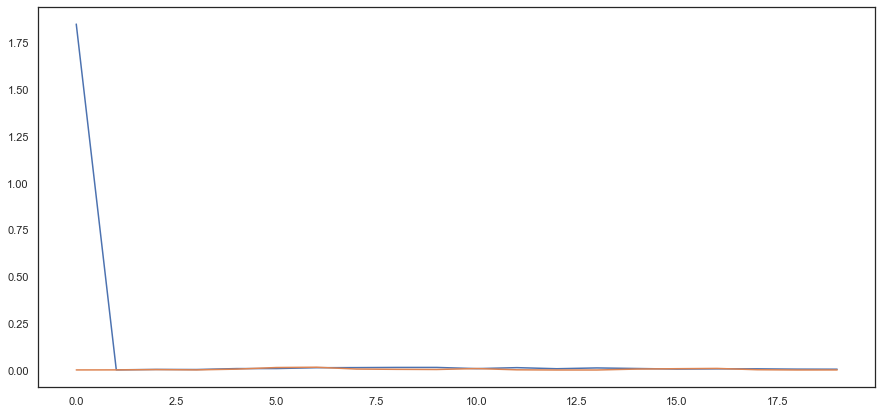

In [85]:
plt.plot(history.history['mse'], label='root_mean_squared_error')    #blue
plt.plot(history.history['val_mse'], label = 'val_root_mean_squared_error') 

In [86]:
to_compare = m2.predict(encoder.predict(X_test[:50]))
nn_results_df = pd.DataFrame(data=to_compare,columns=lm22_small.columns)

In [87]:
test_df = pd.DataFrame(data=X_test[:50],columns=lm22.index)
cibersort_results = td.cibersort_main(test_df.T,lm22_small).fillna(0)

Running CiberSort...


In [88]:
test_df.head()

genesinput,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAGAB,AAK1,AAMP,...,ZSCAN5A,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3
0,0.0,0.055658,0.002595,0.000000,0.0,0.013493,0.000000,0.008198,0.004432,0.023997,...,0.000000,0.033784,0.007973,0.000000,0.0,0.0,0.015818,0.000000,0.013896,0.024957
1,0.0,0.000000,0.002546,0.000000,0.0,0.000000,0.001220,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.017083,0.0,0.0,0.000000,0.055588,0.012237,0.000000
2,0.0,0.000000,0.000000,0.006194,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008497,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.048583,0.002094,0.005526,0.0,0.000000,0.001158,0.006042,0.003845,0.019667,...,0.008022,0.024861,0.006187,0.018696,0.0,0.0,0.000000,0.046063,0.000000,0.018367
4,0.0,0.000000,0.002329,0.000000,0.0,0.000000,0.000000,0.007129,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.019768


## Comparting Predictions

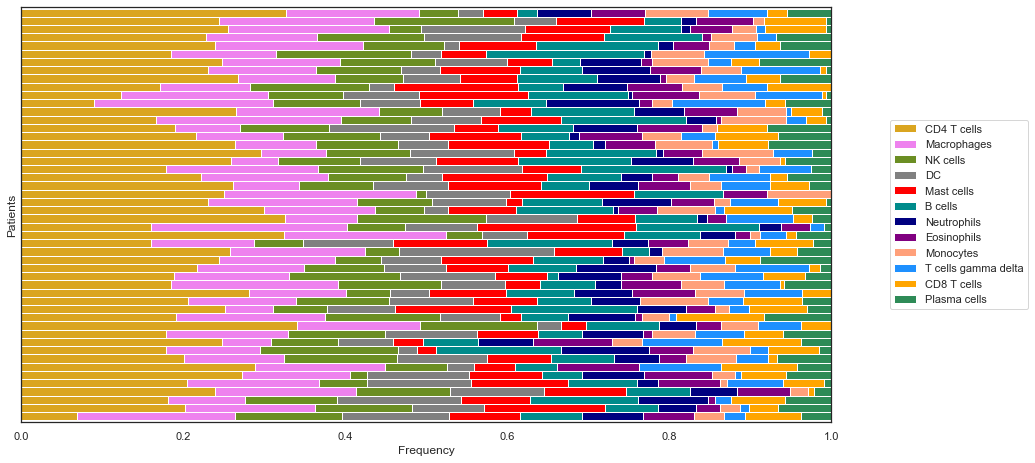

In [89]:
td.cell_frequency_barchart(pd.DataFrame(data=Y[:50],columns=lm22_small.columns))

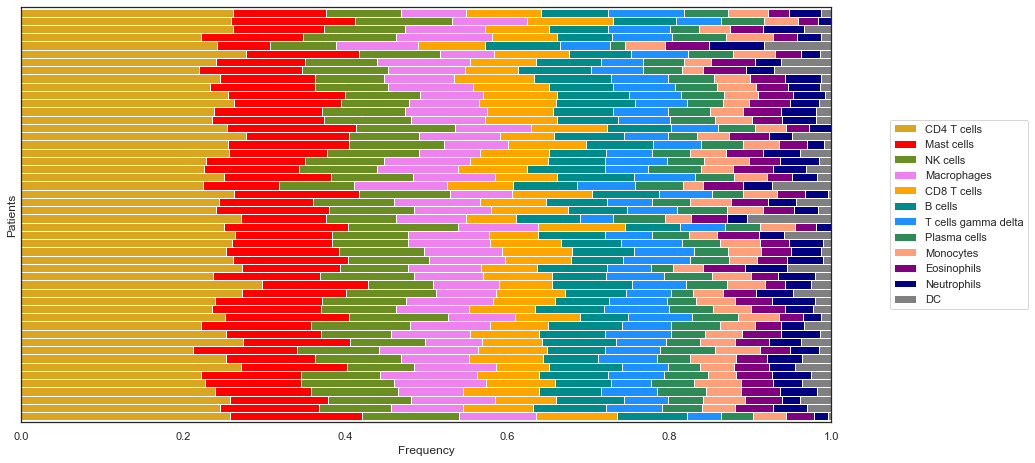

In [90]:
td.cell_frequency_barchart(nn_results_df)

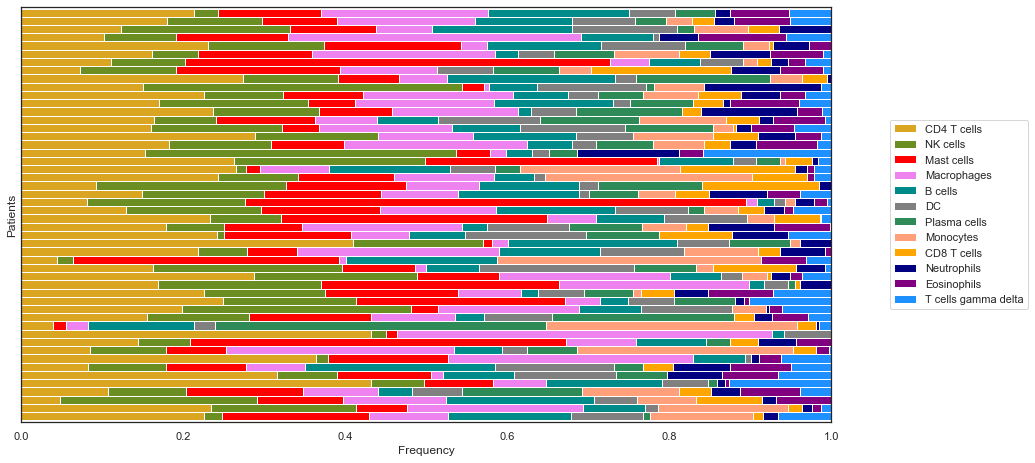

In [91]:
td.cell_frequency_barchart(cibersort_results)

In [92]:
nn_comb = td.combine_celltypes(nn_results_df)
c_comb = td.combine_celltypes(cibersort_results).fillna(0)
y_comb = td.combine_celltypes(pd.DataFrame(data=Y[:50],columns=lm22_small.columns))

0.6862989822735797

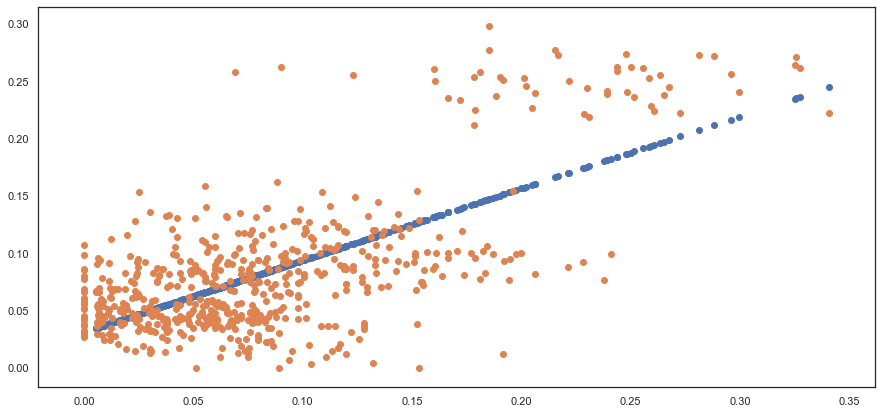

In [93]:
lin = LinearRegression().fit(y_comb.values.flatten().reshape(-1, 1),nn_comb.values.flatten().reshape(-1, 1))
plt.scatter(y_comb.values.flatten().reshape(-1, 1),lin.predict(y_comb.values.flatten().reshape(-1, 1)))
plt.scatter(y_comb.values,nn_comb.values)
lin.score(y_comb.values.flatten().reshape(-1, 1),nn_comb.values.flatten().reshape(-1, 1))**.5

0.3819370827953205

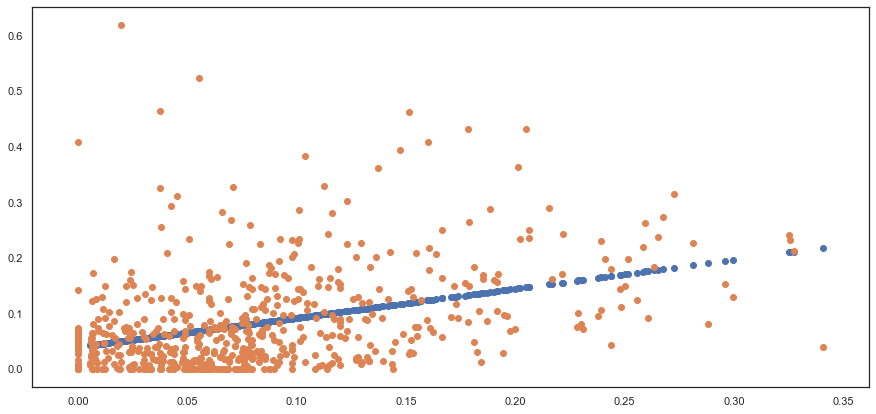

In [94]:
lin = LinearRegression().fit(y_comb.values.flatten().reshape(-1, 1),c_comb.values.flatten().reshape(-1, 1))
plt.scatter(y_comb.values.flatten().reshape(-1, 1),lin.predict(y_comb.values.flatten().reshape(-1, 1)))
plt.scatter(y_comb.values,c_comb.values)
lin.score(y_comb.values.flatten().reshape(-1, 1),c_comb.values.flatten().reshape(-1, 1))**.5

In [95]:
print("NN MAE:",mean_absolute_error(y_comb.values,nn_comb.values))
print("CIBERSORT MAE:",mean_absolute_error(y_comb.values,c_comb.values))

NN MAE: 0.03856040630468424
CIBERSORT MAE: 0.062398268525833744


## Bring in Other Test Data

In [96]:
cibersort_gep = pd.read_csv("C:/Users/NathanGrant/Programs/TripodsREU/data/ExampleMixtures-GEPs.txt",delimiter="\t",index_col="Hugo_Symbol")
cibersort_gep.index.name = "genesinput"
cibersort_gep = td.df_normalization(cibersort_gep,"minmax")
cibersort_gep.head()

,Mix1,Mix2,Mix3,Mix4,Mix5
genesinput,,,,,
A1CF,0.008194,0.007561,0.006107,0.009941,0.008230
A2M,0.003884,0.013720,0.023673,0.021260,0.083296
A4GALT,0.001864,0.002359,0.001784,0.002153,0.002654
A4GNT,0.007431,0.006687,0.004430,0.008638,0.006487
AAAS,0.002780,0.002725,0.002882,0.001509,0.002111


In [97]:
cibersort_truth = pd.read_csv("C:/Users/NathanGrant/Programs/TripodsREU/data/ExampleMixtures-GroundTruth.txt",delimiter="\t")
cibersort_truth.columns = lm22_small.columns
cibersort_truth.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.18,0.16,0.13,0.11,0.09,0.07,0.06,0.05,0.04,0.03,...,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,0.20,0.00,0.19,0.00,0.18,0.00,0.10,0.00,0.09,0.00,...,0.05,0.00,0.04,0.00,0.04,0.00,0.02,0.00,0.02,0.00
2,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.05,0.07,0.11,...,0.11,0.07,0.05,0.03,0.02,0.01,0.01,0.01,0.00,0.00
3,0.17,0.12,0.08,0.06,0.03,0.02,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.02,0.03,0.06,0.08,0.12,0.17
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.04,...,0.02,0.04,0.09,0.11,0.08,0.05,0.04,0.07,0.14,0.20


In [98]:
lm22.T.head()

genesinput,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAGAB,AAK1,AAMP,...,ZSCAN5A,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3
B cells naive,444.697134,20.303593,33.212550,381.468767,18.375534,234.767226,54.982722,36.587171,133.845450,785.226264,...,618.750693,2505.072467,34.488729,785.907083,83.495313,153.851062,56.249196,512.873831,146.841228,519.420730
B cells memory,499.621456,23.559923,42.983330,499.399737,21.251780,251.068231,76.489893,46.495668,125.976707,1016.836195,...,426.149348,1991.102583,39.162552,1004.186179,90.271544,94.957767,41.225592,641.556952,259.027984,501.143497
Plasma cells,317.348613,45.836411,127.584987,289.693270,70.266151,691.357992,33.538210,42.961361,192.888217,1258.260720,...,305.302004,1264.736695,132.923739,535.375457,97.090451,104.211251,30.533496,635.943077,326.776069,521.910283
T cells CD8,267.475035,21.880510,44.990740,201.294509,169.849984,384.900206,23.365501,293.745987,159.400761,524.070942,...,182.465549,729.156318,197.949608,291.575512,135.179940,80.056476,295.125513,1518.436823,457.165990,761.114362
T cells CD4 naive,215.012469,18.571284,142.182291,219.494712,169.843772,404.673281,24.485187,220.108732,108.993570,447.085391,...,81.202364,393.915251,296.506015,365.612262,227.598349,92.357356,486.174743,1052.262476,406.210896,701.541609


In [99]:
cibersort_gep = cibersort_gep.merge(lm22, how="right",on="genesinput").fillna(0)
cibersort_gep = cibersort_gep.loc[lm22.index,["Mix1","Mix2",'Mix3',"Mix4","Mix5"]]

In [100]:
to_compare = m2.predict(encoder.predict(cibersort_gep.T.values))
nn_results_df = pd.DataFrame(data=to_compare,columns=lm22_small.columns)
test_df = pd.DataFrame(data=cibersort_gep.T.values,columns=lm22.index)
cibersort_results = td.cibersort_main(test_df.T,lm22_small).fillna(0)

Running CiberSort...


In [101]:
nn_comb = td.combine_celltypes(nn_results_df)
c_comb = td.combine_celltypes(cibersort_results).fillna(0)
y_comb = td.combine_celltypes(cibersort_truth)

In [102]:
cibersort_gep.head()

,Mix1,Mix2,Mix3,Mix4,Mix5
genesinput,,,,,
A1CF,0.008194,0.007561,0.006107,0.009941,0.008230
A2M,0.003884,0.013720,0.023673,0.021260,0.083296
A4GALT,0.001864,0.002359,0.001784,0.002153,0.002654
A4GNT,0.007431,0.006687,0.004430,0.008638,0.006487
AAAS,0.002780,0.002725,0.002882,0.001509,0.002111


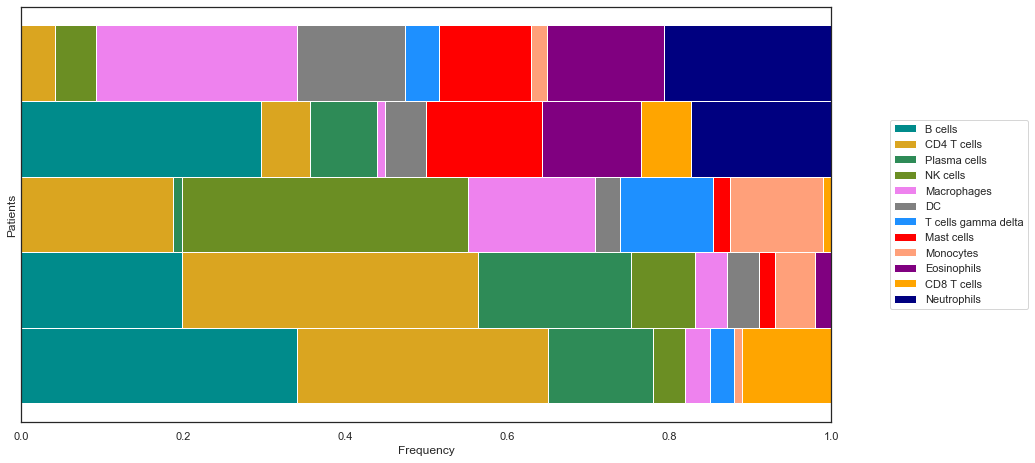

In [103]:
td.cell_frequency_barchart(cibersort_truth)

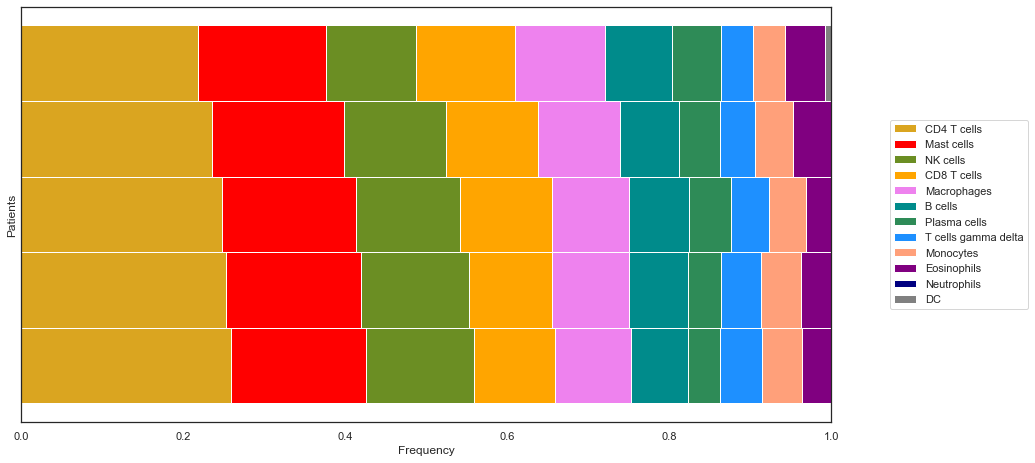

In [104]:
td.cell_frequency_barchart(nn_results_df)

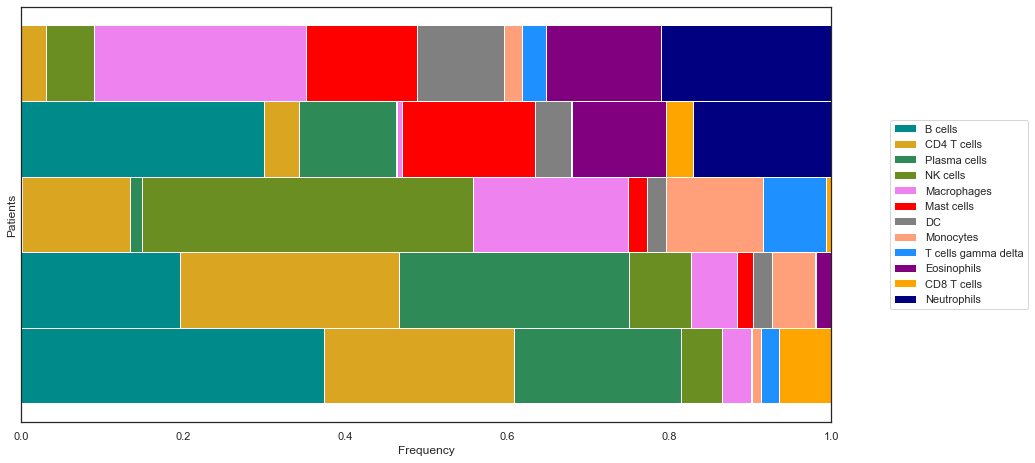

In [105]:
td.cell_frequency_barchart(cibersort_results)

0.29741589463384965

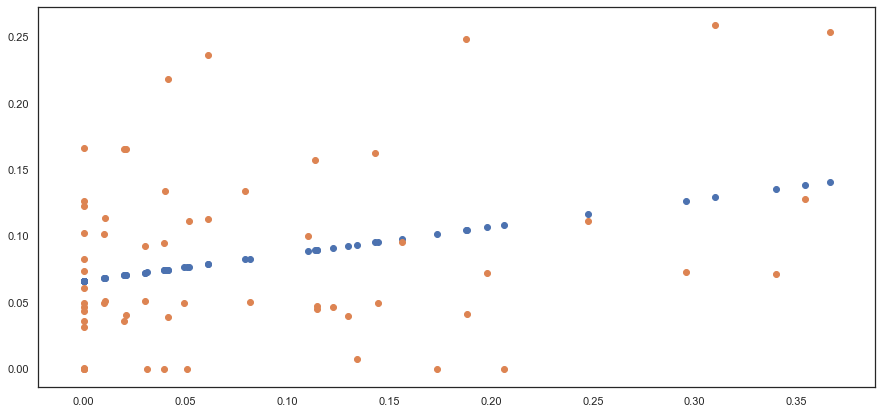

In [106]:
lin = LinearRegression().fit(y_comb.values.flatten().reshape(-1, 1),nn_comb.values.flatten().reshape(-1, 1))
plt.scatter(y_comb.values.flatten().reshape(-1, 1),lin.predict(y_comb.values.flatten().reshape(-1, 1)))
plt.scatter(y_comb.values,nn_comb.values)
lin.score(y_comb.values.flatten().reshape(-1, 1),nn_comb.values.flatten().reshape(-1, 1))**.5

0.9614975223929356

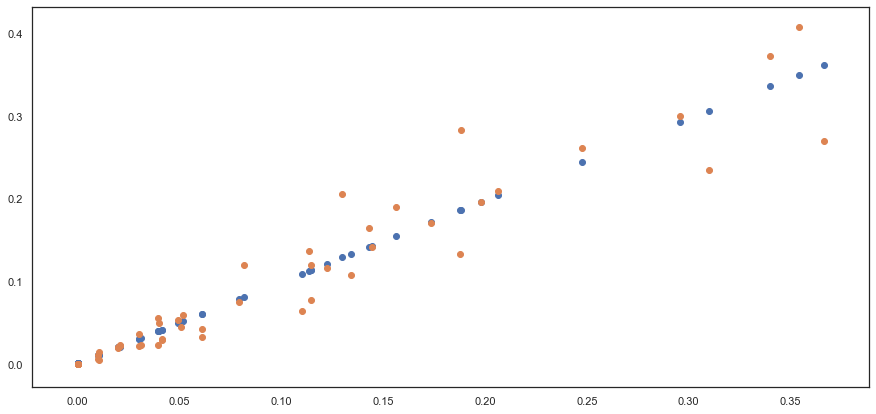

In [107]:
lin = LinearRegression().fit(y_comb.values.flatten().reshape(-1, 1),c_comb.values.flatten().reshape(-1, 1))
plt.scatter(y_comb.values.flatten().reshape(-1, 1),lin.predict(y_comb.values.flatten().reshape(-1, 1)))
plt.scatter(y_comb.values,c_comb.values)
lin.score(y_comb.values.flatten().reshape(-1, 1),c_comb.values.flatten().reshape(-1, 1))**.5

In [108]:
print("NN MAE:",mean_absolute_error(y_comb.values,nn_comb.values))
print("CIBERSORT MAE:",mean_absolute_error(y_comb.values,c_comb.values))

NN MAE: 0.0806803574482853
CIBERSORT MAE: 0.015547287340166438
